In [12]:
from smartem.segmentation import segmenter, utils
from skimage import measure
from smartem.offline.train_mb_error_detector.NNtools import UNet

import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

import h5py
import matplotlib.pyplot as plt
import torch
import numpy as np
# import pyvoi
import pandas as pd
import seaborn as sns
import segmentation_models_pytorch as smp
from skimage import segmentation
import tqdm

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
path = "/storage2/projects/smartEM/aligned-stacks/fused/mip0/"
section = 2

model = UNet.UNet(1,2)
model_path = '/home/ssawmya-local/FM_work/SmartEM/pretrained_models/em2mb_best.pth'


Iseg = segmenter.Segmenter(model_path, segmenter_function = segmentation.watershed, device=device)
Iseg.set_model(model_class=model)

Using watershed function...


In [13]:
fused_images = "/storage2/projects/smartEM/aligned-stacks/fused/mip0"

sections = range(1, 95)

images = []
membranes = []
segs = []

for section in tqdm.tqdm(sections):
    section_prefix = f"section_{str(section).zfill(5)}"
    section_folder = f"{fused_images}/{section_prefix}"
    image_path = f"{section_folder}/{section_prefix}_tr3-tc8.png"

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    images.append(img)
    membranes.append(Iseg.get_membranes(img))
    segs.append(Iseg.get_labels(img))


100%|██████████| 94/94 [03:15<00:00,  2.08s/it]


In [35]:
sections = range(5,11)

visualization_sections = {}
for section in sections:
    visualization_sections[f"section_{section}_image"] = images[section-1]
    
    visualization_sections[f"section_{section}_label"] = utils.shuffle_labels(segs[section-1])
    visualization_sections[f"section_{section}_pred"] = membranes[section-1]

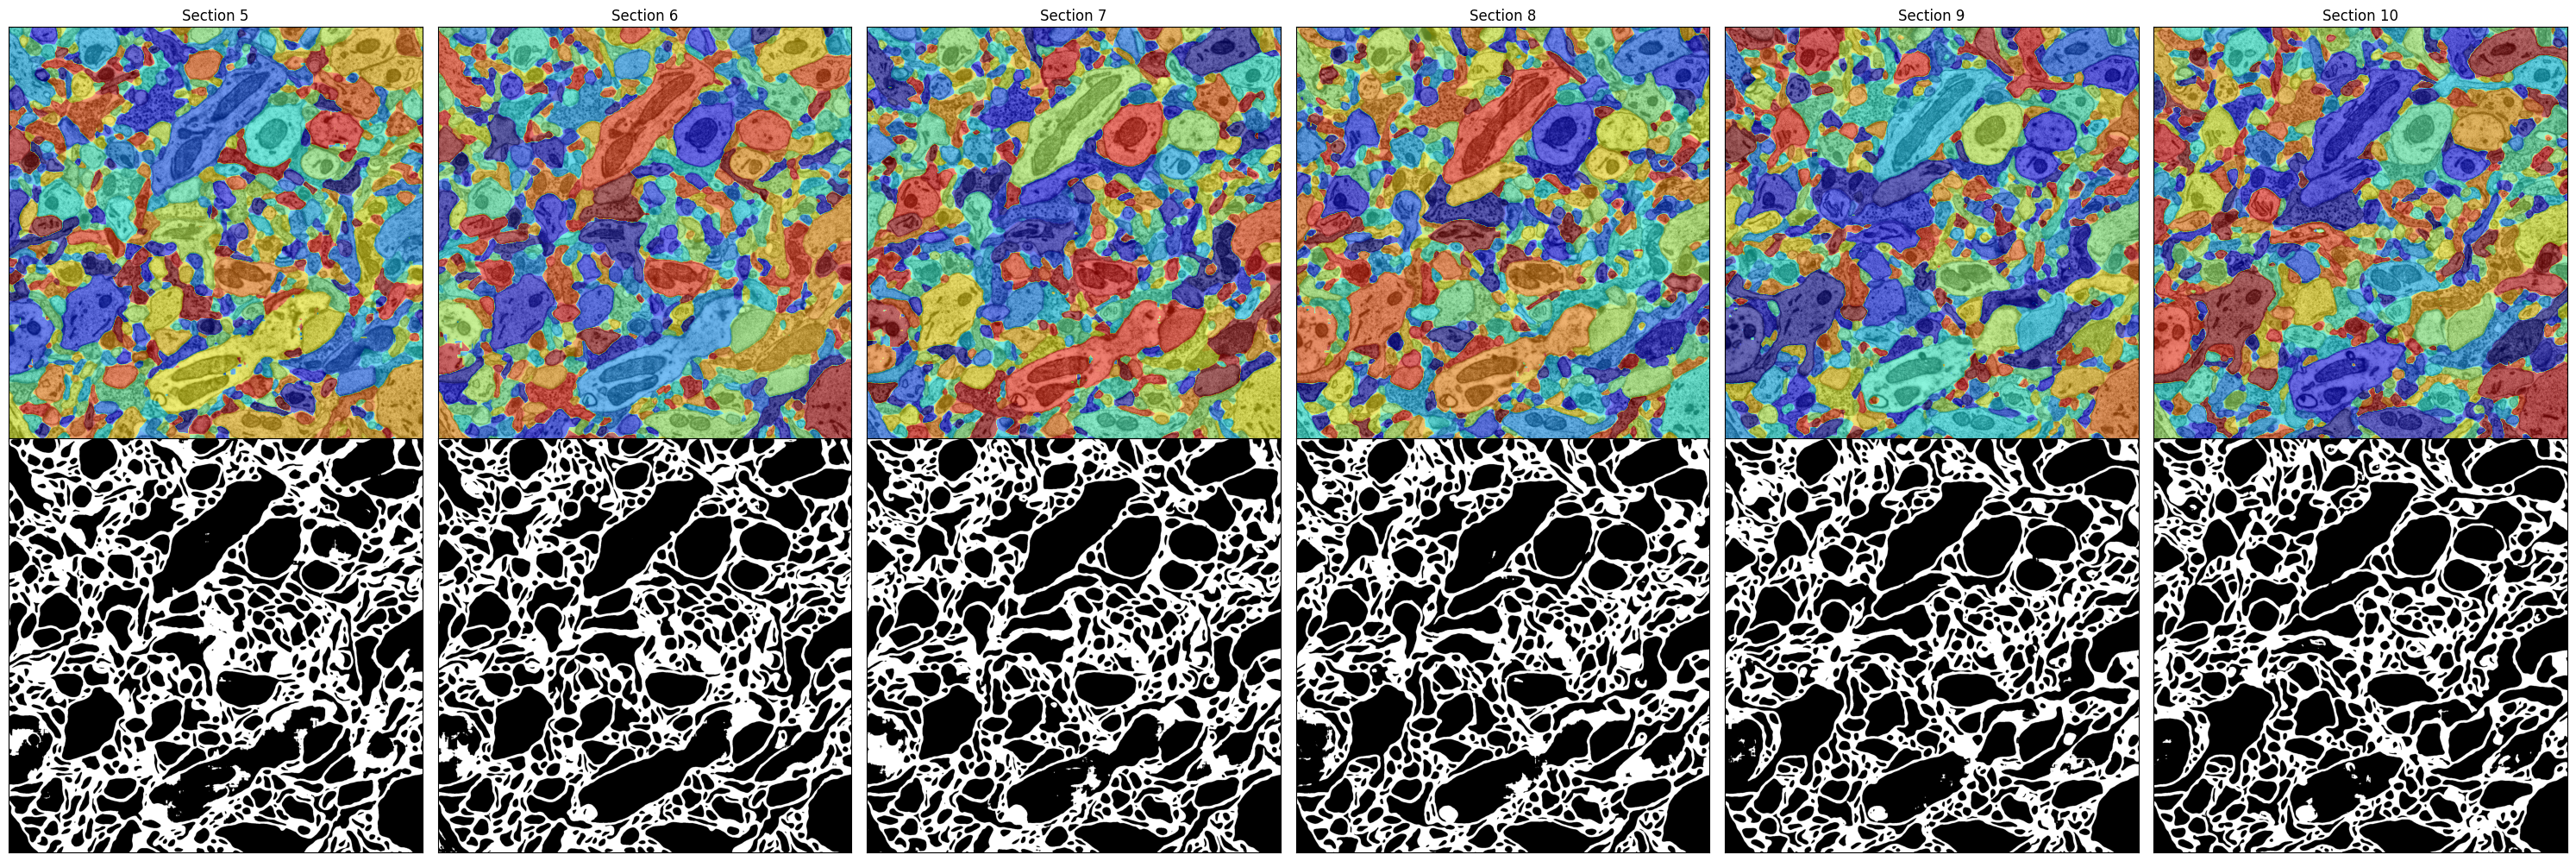

In [36]:
utils.visualize(**visualization_sections)

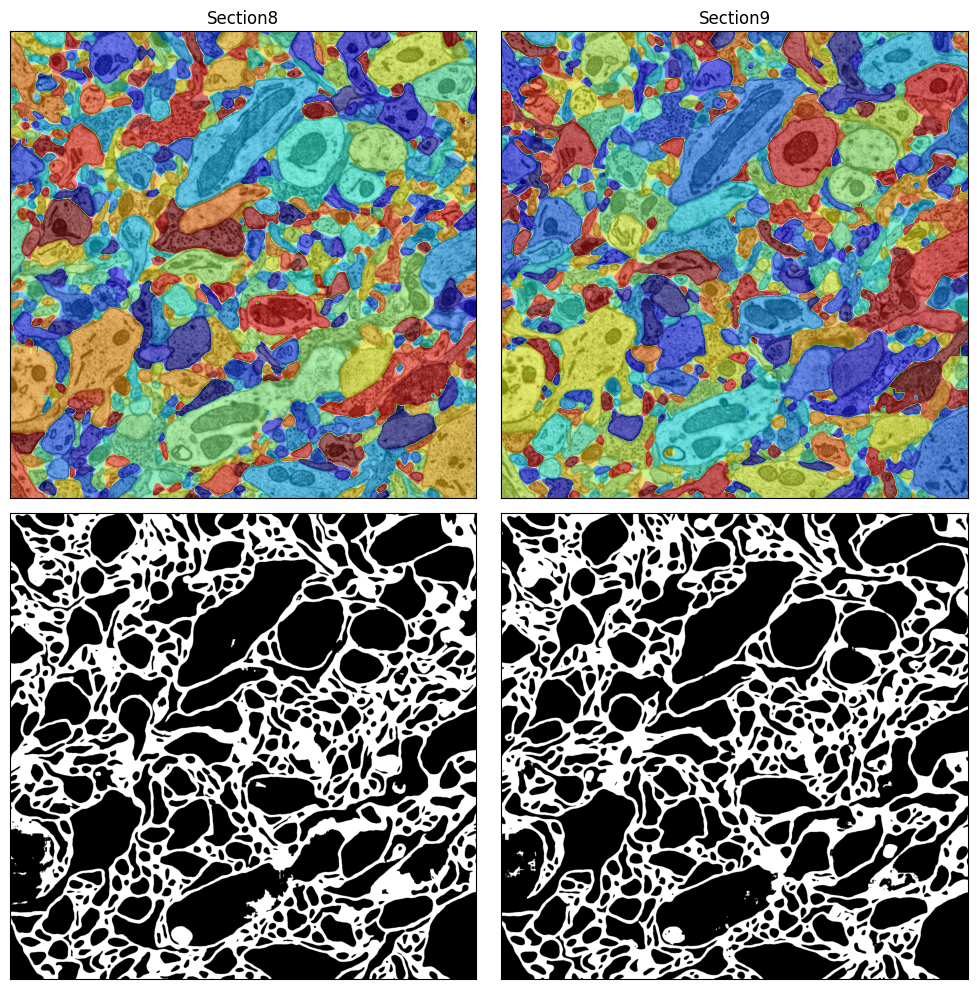

In [21]:
# visualization_sections = {}
# visualization_sections["section8_image"] = images[7]
# visualization_sections["section8_pred"] = membranes[7]
# visualization_sections["section8_label"] = utils.shuffle_labels(segs[7])

# visualization_sections["section9_image"] = images[8]
# visualization_sections["section9_pred"] = membranes[8]
# visualization_sections["section9_label"] = utils.shuffle_labels(segs[8])


# utils.visualize(**visualization_sections)
